# 2a

In [1]:
import itertools
import random
import numpy as np
%matplotlib inline
import networkx as nx

In [85]:
import networkx as nx
import matplotlib.pyplot as plt
while True:  
    s=[]
    while len(s)<1000:
        nextval = int(nx.utils.powerlaw_sequence(1, 2.2)[0]) #100 nodes, power-law exponent 2.2
        if nextval!=0:
            s.append(nextval)
    if sum(s)%2 == 0:
        break
G = nx.configuration_model(s)
G=nx.Graph(G) # remove parallel edges
G.remove_edges_from(G.selfloop_edges())

#draw and show graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
# Part of code from https://stackoverflow.com/questions/28920824/generate-a-scale-free-network-with-a-power-law-degree-distributions

Text(0, 0.5, 'Frequency')

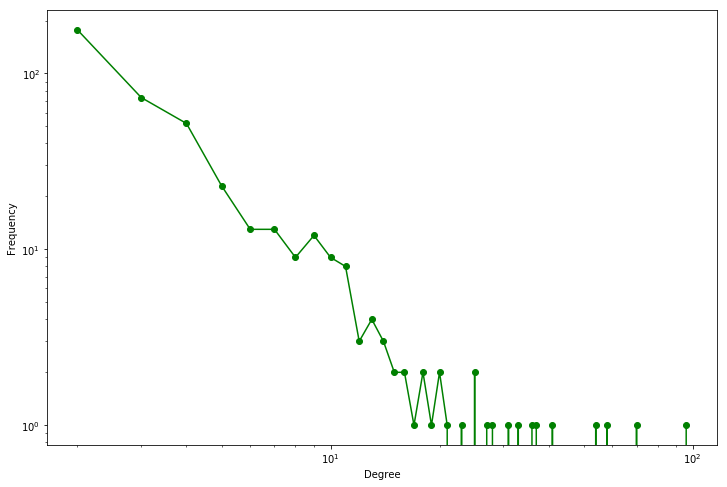

In [86]:
import matplotlib.pyplot as plt
m = 2
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees[m:], degree_freq[m:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [47]:
#a1 = np.random.choice(a=G.node, size=3, replace=False, p=None)

In [52]:
#a1 = list(a1)

In [55]:
#len(a1)

3

In [58]:
#for n in a1:
   #G.remove_node(n)

In [30]:
def seq(start, stop, step=1):
    n = int(round((stop - start)/float(step)))
    if n > 1:
        return([start + step*i for i in range(n+1)])
    elif n == 1:
        return([start])
    else:
        return([])
list_x=seq(0,1,0.01)
print(list_x)

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41000000000000003, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47000000000000003, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001, 0.7000000000000001, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.96, 0.97, 0.98, 0.99, 1.0]


In [35]:
graphs = list(nx.connected_component_subgraphs(G))


In [82]:
H = G.copy()

In [62]:
num_node = len(G)

In [101]:
giant = max(nx.connected_component_subgraphs(G), key=len)

In [172]:
c = []
H = G.copy()
for n in list_x:
    giant = max(nx.connected_component_subgraphs(G), key=len)
    p0=len(giant)/num_node
    a1 = np.random.choice(a=G.node, size=int(n*num_node), replace=False, p=None) # select removing nodes
    a1 = list(a1)
    H = G.copy()
    for n in a1:
        H.remove_node(n)
    try:
        giant = max(nx.connected_component_subgraphs(H), key=len)
        p1=len(giant)/num_node
        c.append(p1/p0)
    except:
        p1=0
        c.append(0)
    

        

In [174]:
c1 = []
H = G.copy()
for n in list_x:
    giant = max(nx.connected_component_subgraphs(G), key=len)
    p0=len(giant)/num_node
    a=sorted(G.degree, key=lambda x: x[1], reverse=True)
    a1=a[0:int(num_node*n)]
    a1=[i[0] for i in a1]
    H = G.copy()
    for n in a1:
        H.remove_node(n)
    try:
        giant = max(nx.connected_component_subgraphs(H), key=len)
        p1=len(giant)/num_node
        c1.append(p1/p0)
    except:
        p1=0
        c1.append(0)


In [175]:
len(c1)

101

In [176]:
    plt.figure(num=1, figsize=(8, 6))
    plt.title('Plot 1', size=14)
    plt.plot(list_x,c)
    plt.plot(list_x,c1)
    plt.legend(loc='upper left')

No handles with labels found to put in legend.


# 2b

In [191]:
def GenerateArr(count,minimum,maximum,average):
    arr = []
    diff = 1
    while len(arr) < count-1:
        if minimum <= average-diff and average+diff <= maximum:
            arr.append(average-diff)
            arr.append(average+diff)
            diff += 1
        else:
            arr.append(average)
            diff = 1
    if len(arr) < count:
        arr.append(average)
    return arr

In [193]:
degree_ER=GenerateArr(1000,0,100,3)

In [222]:
G_ER = nx.expected_degree_graph(degree_ER, selfloops=False)

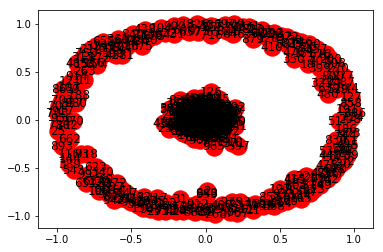

In [195]:
nx.draw_networkx(G_ER)

In [240]:
er = []
H = G_ER.copy()
for n in list_x:
    giant = max(nx.connected_component_subgraphs(G_ER), key=len)
    p0=len(giant)/num_node
    a1 = np.random.choice(a=G_ER.node, size=int(n*num_node), replace=False, p=None) # select removing nodes
    a1 = list(a1)
    H = G_ER.copy()
    for n in a1:
        H.remove_node(n)
    try:
        giant = max(nx.connected_component_subgraphs(H), key=len)
        p1=len(giant)/num_node
        er.append(p1/p0)
    except:
        p1=0
        er.append(0)

In [241]:
er1 = []
H = G_ER.copy()
for n in list_x:
    giant = max(nx.connected_component_subgraphs(G_ER), key=len)
    p0=len(giant)/num_node
    a=sorted(G_ER.degree, key=lambda x: x[1], reverse=True)
    a1=a[0:int(num_node*n)]
    a1=[i[0] for i in a1]
    H = G_ER.copy()
    for n in a1:
        H.remove_node(n)
    try:
        giant = max(nx.connected_component_subgraphs(H), key=len)
        p1=len(giant)/num_node
        er1.append(p1/p0)
    except:
        p1=0
        er1.append(0)

No handles with labels found to put in legend.


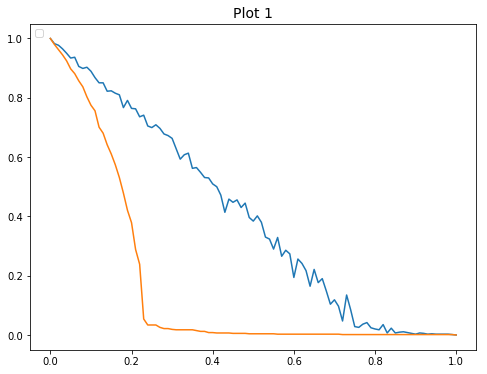

In [242]:
    plt.figure(num=1, figsize=(8, 6))
    plt.title('Plot 1', size=14)
    plt.plot(list_x,er)
    plt.plot(list_x,er1)
    plt.legend(loc='upper left')

#  2C

In [202]:
import matplotlib.pyplot as plt

def XBS(Graph, N , assortative):
    G = Graph.copy()
    for i in range(N):
        edges = random.choices(list(G.edges), k = 2)
        nodes = []
        for edge in edges:
            u = edge[0]
            v = edge[1]
            nodes.append((u,G.degree(u)))
            nodes.append((v,G.degree(v)))
            G.remove_edge(u,v)
            
        nodes = sorted(nodes,key = lambda node:node[1])
        
        a = nodes[3][0]
        b = nodes[2][0]
        c = nodes[1][0]
        d = nodes[0][0]
        
        if assortative:
            G.add_edge(a,b)
            G.add_edge(c,d)
        else:
            G.add_edge(a,d)
            G.add_edge(b,c)
    return G

In [224]:
G_B = XBS(G_ER,1000,True)

In [243]:
er_c = []
H = G_B.copy()
for n in list_x:
    giant = max(nx.connected_component_subgraphs(G_B), key=len)
    p0=len(giant)/num_node
    a1 = np.random.choice(a=G_B.node, size=int(n*num_node), replace=False, p=None) # select removing nodes
    a1 = list(a1)
    H = G_B.copy()
    for n in a1:
        H.remove_node(n)
    try:
        giant = max(nx.connected_component_subgraphs(H), key=len)
        p1=len(giant)/num_node
        er_c.append(p1/p0)
    except:
        p1=0
        er_c.append(0)

In [244]:
er_c1 = []
H = G_B.copy()
for n in list_x:
    giant = max(nx.connected_component_subgraphs(G_B), key=len)
    p0=len(giant)/num_node
    a=sorted(G_B.degree, key=lambda x: x[1], reverse=True)
    a1=a[0:int(num_node*n)]
    a1=[i[0] for i in a1]
    H = G_B.copy()
    for n in a1:
        H.remove_node(n)
    try:
        giant = max(nx.connected_component_subgraphs(H), key=len)
        p1=len(giant)/num_node
        er_c1.append(p1/p0)
    except:
        p1=0
        er_c1.append(0)

In [245]:
    plt.figure(num=1, figsize=(8, 6))
    plt.title('Plot 1', size=14)
    plt.plot(list_x,er_c)
    plt.plot(list_x,er_c1)
    plt.legend(loc='upper left')

No handles with labels found to put in legend.


# 2d 

In [249]:
G_BA=networkx.generators.barabasi_albert_graph(10**4, 2, seed=None)

In [250]:
G_BA1 = XBS(G_BA,1000,False)

In [251]:
er_c = []
H = G_BA1.copy()
for n in list_x:
    giant = max(nx.connected_component_subgraphs(G_BA1), key=len)
    p0=len(giant)/num_node
    a1 = np.random.choice(a=G_BA1.node, size=int(n*num_node), replace=False, p=None) # select removing nodes
    a1 = list(a1)
    H = G_BA1.copy()
    for n in a1:
        H.remove_node(n)
    try:
        giant = max(nx.connected_component_subgraphs(H), key=len)
        p1=len(giant)/num_node
        er_c.append(p1/p0)
    except:
        p1=0
        er_c.append(0)

In [252]:
er_c1 = []
H = G_BA1.copy()
for n in list_x:
    giant = max(nx.connected_component_subgraphs(G_BA1), key=len)
    p0=len(giant)/num_node
    a=sorted(G_BA1.degree, key=lambda x: x[1], reverse=True)
    a1=a[0:int(num_node*n)]
    a1=[i[0] for i in a1]
    H = G_BA1.copy()
    for n in a1:
        H.remove_node(n)
    try:
        giant = max(nx.connected_component_subgraphs(H), key=len)
        p1=len(giant)/num_node
        er_c1.append(p1/p0)
    except:
        p1=0
        er_c1.append(0)

In [505]:
    plt.figure(num=1, figsize=(8, 6))
    plt.title('Plot 1', size=14)
    plt.plot(list_x,er_c)
    plt.plot(list_x,er_c1)
    plt.legend(loc='upper left')

No handles with labels found to put in legend.


# 3 
If one node boomed, it will give every its neighbors one grain

In [276]:
degree_3=GenerateArr(1000,0,100,2)

In [532]:
G_3 = nx.expected_degree_graph(degree_3, selfloops=False)

In [533]:
for n in range(10**3):
    nx.set_node_attributes(G_3,0,"bucket")
    #a = random.randint(1,10**4)
    #G_3.nodes[a]["bucket"] += 1

In [534]:
from random import sample
random_nodes = sample(list(G_3.nodes()), 1)
random_nodes[0]

66

In [535]:
size=[]
for _ in range(10**4):
    
    if(len(G_3)>0):
        random_nodes = sample(list(G_3.nodes()), 1)[0]
        G_3.nodes[random_nodes]["bucket"] += 1
        ans = kill(G_3,random_nodes,0)
        
    size.append(ans)
    

In [536]:
def kill(G_3,node):
    if(G_3.has_node(node)):
        size = 0 # calculate how many node boomed this turn
        if(G_3.nodes[node]["bucket"] >= G_3.degree(node)): #boom
            neighbors = [n for n in G_3.neighbors(node)]
            G_3.remove_node(node) # kill the boomed node
            size+=1
            if(len(neighbors) > 0):
                for j in neighbors:
                    if(G_3.has_node(j)):
                        G_3.nodes[j]["bucket"] += 1 # get every neighbors one 
                        size += kill(G_3,j)
        return size
    else:
        return 0;


In [537]:
tem=[]
list_1=size
s=set()
for i in list_1:
    if i not in s:
        s.add(i)
        tem.append(list_1.count(i)/1000)

In [538]:
tem

[9.697,
 0.239,
 0.03,
 0.008,
 0.008,
 0.002,
 0.006,
 0.001,
 0.003,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001]

In [539]:
s=list(s)
s

[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 16, 275, 53, 60]

In [540]:
    plt.figure(num=1, figsize=(8, 6))
    plt.title('Plot 1', size=14)
    plt.loglog(s,tem,'o')
    plt.legend(loc='upper left')

No handles with labels found to put in legend.
